In [62]:
import pandas as pd 
import warnings
warnings.filterwarnings("ignore", message="Precision and F-score are ill-defined")

In [63]:
epl = pd.read_csv("Project_13803342/dataframed_cleaned/epl_data_matches_copy.csv")

In [64]:
# Creating lists of different features
all_both = ["xga","xg","sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y","poss" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y" ,"kp", "1/3" ,"ppa" ,"crspa" ,"prog", "sca_x", "passlive_x" ,"to_x" ,"sca_y" ,"venue_code" ,"opp_code", "hour", "day_code", "referee_code" ,"formation_code", "captain_code", "tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x","int_x", "err_x", "tkl_y",  "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "int_y", "err_y"
]
both_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x", "sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
team_shooting = ["sh_x", "sot_x","dist_x", "fk_x", "pk_x", "pkatt_x"]
opp_shooting = ["sh_y", "sot_y", "dist_y" ,"fk_y" ,"pk_y", "pkatt_y"]
both_possession = ["poss" ,"poss_y" ,"succ%_x" ,"cpa_x", "succ%_y", "cpa_y"]
team_possession = ["poss","succ%_x","cpa_x","1/3"]
opp_possession = ["poss_y","succ%_y","cpa_y"]
team_creation = ["sca_x", "passlive_x" ,"to_x"]
both_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x", "tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
team_def = ["tkl_x", "tklw_x", "def 3rd_x", "tkl%_x", "blocks_x", "sh_x", "int_x", "err_x"]
opp_def = ["tkl_y", "tklw_y", "def 3rd_y", "tkl%_y", "blocks_y", "sh_y", "int_y", "err_y"]
important = [ "xga", "xg","sot_x", "sot_y", "sh_x", "dist_x", "tkl%_x", "dist_y", "sh_y", "succ%_y", "tkl%_y", "poss_x", "succ%_x", "captain_code", "1/3", "opp_code"]


f1 = all_both 
f2 = both_shooting
f3 = team_shooting
f4 = opp_shooting 
f5 = both_possession
f6 = team_possession 
f7 = opp_possession 
f8 = team_creation
f9 = both_def 
f10 = team_def 
f11 = opp_def

In [65]:
import pandas as pd


# Defining the columns to normalise
columns_to_normalise = ['xga', 'xg', 'sh_x', 'sot_x', 'dist_x', 'fk_x', 'pk_x', 'pkatt_x', 'sh_y', 'sot_y', 'dist_y', 'fk_y', 'pk_y', 'pkatt_y', 'poss_x', 'poss_y', 'succ%_x', 'cpa_x', 'succ%_y', 'cpa_y', 'kp', '1/3', 'ppa', 'crspa', 'prog', 'sca_x', 'passlive_x', 'to_x', 'sca_y', 'venue_code', 'opp_code', 'hour', 'day_code', 'referee_code', 'formation_code', 'captain_code', 'tkl_x', 'tklw_x', 'def 3rd_x', 'tkl%_x', 'blocks_x','int_x', 'err_x', 'tkl_y', 'tklw_y', 'def 3rd_y', 'tkl%_y', 'blocks_y', 'int_y', 'err_y']

# Creating a min-max normalisation function
def min_max_normalisation(column):
    return (column - column.min()) / (column.max() - column.min())

# Applying min-max normalisation to selected columns
normalised_data = epl[columns_to_normalise].apply(min_max_normalisation)

# Appending the normalised columns with the original dataframe
epl_normalised = pd.concat([epl.drop(columns=columns_to_normalise), normalised_data], axis=1)

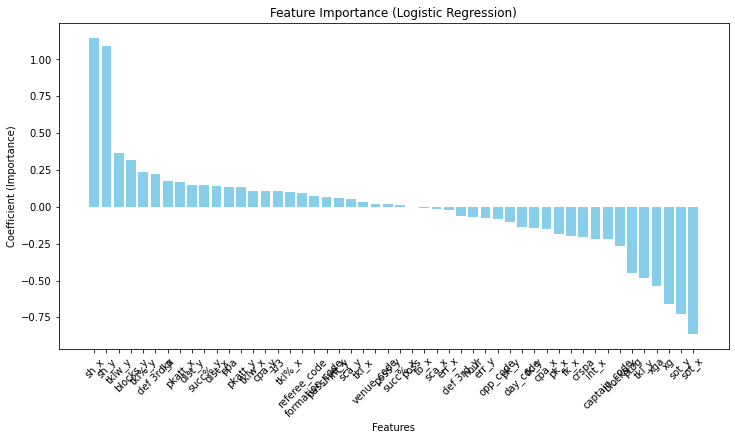

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Splitting data into features (x) and target (y)
x = epl_normalised[f1]  # Features
y = epl_normalised['result']  # Target variable

# Creating and training the logistic regression model
lm = LogisticRegression(max_iter=1000)
lm.fit(x, y)

# Getting the feature coefficients (importances)
importances = lm.coef_[0]

# Creating a dataframe to store the feature names and their importances
feature_importances_df = pd.DataFrame({'Feature': f1, 'Importance': importances})

# Sorting the dataframe by importances in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plotting feature importances
plt.figure(figsize=(12, 6))
plt.bar(feature_importances_df['Feature'], feature_importances_df['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient (Importance)')
plt.title('Feature Importance (Logistic Regression)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [67]:
#Extracting best feature
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# list of the different features
features = [f1,f2, f3, f4, f5, f6, f7, f8, f9, f10, f11]


# Features and target variable
x = epl[all_both]  # Features
y = epl['result']  # Target variable

# Standardise the features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled_df = pd.DataFrame(x_scaled, index=epl.index, columns=all_both)

# Splitting the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled_df, y, test_size=0.3, random_state=42,stratify=y)

# Initialising an empty dictionary to store results
results = {}

# Looping through each feature and testing out the model
for i, feature in enumerate(features, 1):
    # Select the current feature
    x_train_current = x_train[feature]
    x_test_current = x_test[feature]
    
    # Creating a LM model
    lm = LogisticRegression()
    
    # Training the model on the training data
    lm.fit(x_train_current, y_train)
    
    # Evaluating the model's performance on the testing data
    y_pred = lm.predict(x_test_current)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Storing the results in the dictionary
    results[f'f{i}'] = {'accuracy': accuracy, 'classification_report': report}

# Printing out the results
for key, value in results.items():
    print(f"Feature {key}:")
    print(f"Accuracy: {value['accuracy']}")
    print("Classification Report:")
    report_df = pd.DataFrame(value['classification_report']).transpose()
    print(report_df)

print("Feature with the highest accuracy:")
max_accuracy_feature = max(results, key=lambda x: results[x]['accuracy'])
print(max_accuracy_feature)
print("Accuracy:", results[max_accuracy_feature]['accuracy'])


Feature f1:
Accuracy: 0.6175349428208387
Classification Report:
              precision    recall  f1-score     support
D              0.333333  0.176136  0.230483  176.000000
L              0.647239  0.722603  0.682848  292.000000
W              0.663043  0.764890  0.710335  319.000000
accuracy       0.617535  0.617535  0.617535    0.617535
macro avg      0.547872  0.554543  0.541222  787.000000
weighted avg   0.583445  0.617535  0.592825  787.000000
Feature f2:
Accuracy: 0.5933926302414231
Classification Report:
              precision    recall  f1-score     support
D              0.303571  0.096591  0.146552  176.000000
L              0.621118  0.684932  0.651466  292.000000
W              0.611247  0.783699  0.686813  319.000000
accuracy       0.593393  0.593393  0.593393    0.593393
macro avg      0.511979  0.521740  0.494944  787.000000
weighted avg   0.546103  0.593393  0.552877  787.000000
Feature f3:
Accuracy: 0.5641677255400254
Classification Report:
              precision 

In [68]:
#1 
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Splitting data into features (x) and target (y)
x = x_scaled_df[f1]
y = epl["result"]

# Defining a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term (L1 or L2 regularization)
    'solver': ['liblinear'],  # Solver algorithm
}


# Initialising RF classifier
lm = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(lm, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results1 = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results1)
print("Mean Accuracy:", cv_results1.mean())

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-Validation Results:
[0.67391304 0.70108696 0.63586957 0.66847826 0.6576087  0.59782609
 0.6284153  0.65027322 0.63934426 0.6557377 ]
Mean Accuracy: 0.650855310049893


In [69]:
#2 Normalised
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd


# Splitting data into features (x) and target (y)
x = epl_normalised[f1]
y = epl["result"]

# Defining a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term (L1 or L2 regularization)
    'solver': ['liblinear'],  # Solver algorithm
}


# Initialising LM classifier
lm = LogisticRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(lm, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results_norm = cross_val_score(best_model, x_train, y_train, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_norm)
print("Mean Accuracy:", cv_results_norm.mean())

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-Validation Results:
[0.66304348 0.69021739 0.63043478 0.66304348 0.64673913 0.61956522
 0.63387978 0.64480874 0.62295082 0.64480874]
Mean Accuracy: 0.6459491565692563


In [70]:
#3 balanced w-SMOTE (standardised)
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE

# Assuming epl is your dataframe and f2 contains feature columns
# Splitting data into features (x) and target (y)
x = x_scaled_df[f1]
y = epl["result"]

# Define a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term (L1 or L2 regularization)
    'solver': ['liblinear'],  # Solver algorithm
}


# Initialising a LM classifier
lm = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
# Applying SMOTE to training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(lm, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results_smote = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote)
print("Mean Accuracy:", cv_results_smote.mean())

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-Validation Results:
[0.58035714 0.57589286 0.60267857 0.61160714 0.58482143 0.5625
 0.59375    0.61607143 0.61883408 0.61434978]
Mean Accuracy: 0.5960862427930814


In [71]:
#4 balanced w-SMOTE (normalised)
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from imblearn.over_sampling import SMOTE


# Splitting data into features (x) and target (y)
x = epl_normalised[f1]
y = epl["result"]

# Defining a parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term (L1 or L2 regularization)
    'solver': ['liblinear'],  # Solver algorithm
}


# Initialising RF classifier
lm = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(lm, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train_resampled, y_train_resampled)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_

# Results
cv_results_smote_norm = cross_val_score(best_model, x_train_resampled, y_train_resampled, cv=10, scoring='accuracy')
print("Cross-Validation Results:")
print(cv_results_smote_norm)
print("Mean Accuracy:", cv_results_smote_norm.mean())

Best Hyperparameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Cross-Validation Results:
[0.58928571 0.57589286 0.58035714 0.60714286 0.59375    0.57589286
 0.58035714 0.60267857 0.60538117 0.64573991]
Mean Accuracy: 0.5956478219090326


In [72]:
# Returning the results of the Cross-Validation:
print("Accuracy of unbalanced dataset: ")
print("Standardised", cv_results1.mean())
print("Normalised", cv_results_norm.mean())
print("\nAccuracy of balanced dataset with SMOTE: ")
print("Standardised",cv_results_smote.mean())
print("Normalised",cv_results_smote_norm.mean())

Accuracy of unbalanced dataset: 
Standardised 0.650855310049893
Normalised 0.6459491565692563

Accuracy of balanced dataset with SMOTE: 
Standardised 0.5960862427930814
Normalised 0.5956478219090326


In [73]:
# BEST MODEL
from sklearn.model_selection import GridSearchCV, StratifiedKFold,cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Splitting data into features (x) and target (y)
x = x_scaled_df[f1]
y = epl["result"]

# Defining parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty term (L1 or L2 regularization)
    'solver': ['liblinear'],  # Solver algorithm
}


# Initialising LM classifier
lm = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)



# Initialising GridSearchCV with KNN classifier, parameter grid, and stratified cross-validation
grid_search = GridSearchCV(lm, param_grid, cv=10, scoring='accuracy')

# Fitting GridSearchCV to the data
grid_search.fit(x_train, y_train)

# Getting the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Getting the best model
best_model = grid_search.best_estimator_
# Training the best model on the entire training set
best_model.fit(x_train, y_train)

# Prediction on the test set
y_pred = best_model.predict(x_test)

# Calculating accuracy on the test set
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)
report = classification_report(y_test,y_pred)
print(report)
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)

Best Hyperparameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.6315120711562897
              precision    recall  f1-score   support

           D       0.58      0.04      0.07       184
           L       0.64      0.78      0.70       287
           W       0.63      0.84      0.72       316

    accuracy                           0.63       787
   macro avg       0.62      0.55      0.50       787
weighted avg       0.62      0.63      0.56       787

[[  7  82  95]
 [  2 223  62]
 [  3  46 267]]


Some of the code from the heatmap below was extracted from kaggle.
sns heatmaps
'https://www.kaggle.com/code/alkanerturan/stroke-prediction-smote-gridsearch-model-comp'


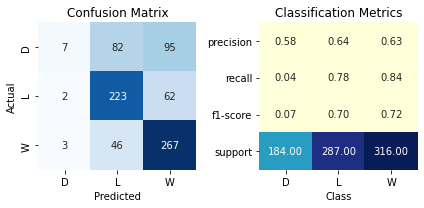

0.6161259832643481 : is the precision score
0.5533278904807287 : is the recall score
0.49736991805957326 : is the f1 score
Highest accuracy score for Logistic Regression: 
63.15


In [74]:

import seaborn as sns
class_names = ["D", "L","W"]
report = classification_report(y_test, y_pred, target_names=class_names, output_dict=True)

# Set up plot size and style
plt.figure(figsize=(6, 3))

# Plot confusion matrix heatmap
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True,cbar=False, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Plot classification report heatmap
plt.subplot(1, 2, 2)
sns.heatmap(np.array([[report[label][metric] for label in class_names] for metric in report[class_names[0]]]),
            annot=True, cbar=False,fmt=".2f", cmap="YlGnBu", xticklabels=class_names, yticklabels=report[class_names[0]].keys())

plt.xticks(rotation=0)
plt.yticks(rotation=0)
#plt.ylabel("Metrics")
plt.xlabel("Class")
plt.title("Classification Metrics")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

print(precision_score(y_test, y_pred, average='macro'), ": is the precision score")
print(recall_score(y_test, y_pred, average='macro'), ": is the recall score")
print(f1_score(y_test, y_pred, average='macro'), ": is the f1 score")

best = test_accuracy * 100
print("Highest accuracy score for Logistic Regression: ")
print(round(best,2))